In [1]:
import datetime as date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#statics dates
startdate = date.datetime(2018, 6, 4)
enddate = date.datetime(2018, 6, 5)

df = pd.read_csv("datasets/20180605_MLCO.csv")
df

,date,open,high,low,close,volume,average,barCount,QQQ_open,QQQ_high,QQQ_low,QQQ_close,QQQ_volume,QQQ_average,QQQ_barCount
0,2018-06-04 10:30:00,32.39,32.48,32.06,32.06,3071,32.370,334,173.16,173.48,173.07,173.46,6828,173.283,2151
1,2018-06-04 10:35:00,32.06,32.14,31.88,31.99,1064,32.009,360,173.46,173.64,173.44,173.56,4879,173.542,1954
2,2018-06-04 10:40:00,32.00,32.20,31.96,32.19,867,32.076,212,173.55,173.72,173.52,173.67,3806,173.640,1503
3,2018-06-04 10:45:00,32.16,32.31,32.16,32.21,138,32.242,108,173.67,173.78,173.66,173.68,3077,173.716,1219
4,2018-06-04 10:50:00,32.22,32.25,32.16,32.20,88,32.198,64,173.68,173.76,173.57,173.58,3097,173.662,1547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2018-06-05 16:35:00,30.85,30.86,30.70,30.72,1078,30.802,591,174.65,174.74,174.62,174.71,3571,174.706,1198
152,2018-06-05 16:40:00,30.72,30.73,30.67,30.67,1329,30.704,643,174.71,174.72,174.66,174.68,3489,174.704,988
153,2018-06-05 16:45:00,30.68,30.68,30.62,30.63,1821,30.650,1206,174.68,174.86,174.67,174.84,4677,174.769,1946
154,2018-06-05 16:50:00,30.63,30.64,30.56,30.59,2469,30.595,1407,174.85,174.86,174.73,174.82,5529,174.793,2489


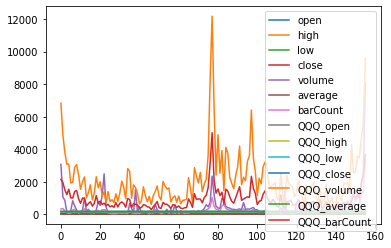

In [2]:
df.plot()